In [1]:
from paddleocr import PaddleOCR

c:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


In [4]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to C:\Users\hp/.paddleocr/whl\rec\en\en_PP-OCRv4_rec_infer\en_PP-OCRv4_rec_infer.tar













































































































































































































































































































































































































































































































100%|██████████| 10.2M/10.2M [04:17<00:00, 39.8kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to C:\Users\hp/.paddleocr/whl\cls\ch_ppocr_mobile_v2.0_cls_infer\ch_ppocr_mobile_v2.0_cls_infer.tar






















































































100%|██████████| 2.19M/2.19M [00:26<00:00, 81.3kiB/s]

[2025/11/05 13:22:59] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\hp/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\hp/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_p

In [5]:
import cv2
from matplotlib import pyplot as plt

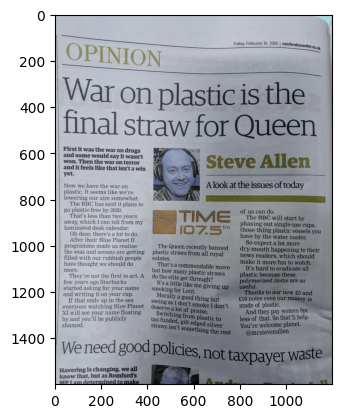

In [9]:
IMG_PATH = 'image\image.jpg'

img = cv2.imread(IMG_PATH, cv2.IMREAD_UNCHANGED)

plt.imshow(img)

In [13]:
result = ocr.ocr(IMG_PATH, cls=True)
for line in result:
    print(line)

[2025/11/05 13:25:27] ppocr DEBUG: dt_boxes num : 73, elapsed : 0.28101539611816406
[2025/11/05 13:25:27] ppocr DEBUG: cls num  : 73, elapsed : 0.2285168170928955
[2025/11/05 13:25:32] ppocr DEBUG: rec_res num  : 73, elapsed : 5.106859922409058
[[[[53.0, 125.0], [459.0, 158.0], [453.0, 228.0], [47.0, 195.0]], ('OPINION', 0.9981356859207153)], [[[26.0, 262.0], [1089.0, 288.0], [1085.0, 424.0], [23.0, 399.0]], ('War on plastic is the', 0.9508261680603027)], [[[40.0, 414.0], [1131.0, 444.0], [1128.0, 546.0], [37.0, 516.0]], ('final straw for Queen', 0.9515016674995422)], [[[31.0, 566.0], [372.0, 577.0], [371.0, 605.0], [30.0, 595.0]], ('First it was the war on drugs', 0.971584677696228)], [[[33.0, 595.0], [380.0, 604.0], [380.0, 630.0], [32.0, 621.0]], ("and some would say it wasn't", 0.9676406979560852)], [[[649.0, 604.0], [1097.0, 598.0], [1098.0, 666.0], [650.0, 672.0]], ('Steve Allen', 0.9795039892196655)], [[[34.0, 623.0], [367.0, 630.0], [366.0, 654.0], [34.0, 647.0]], ('won.Then th

In [20]:
for line in result:
    print(type(line[1][1]), line[1][1])


<class 'tuple'> ('War on plastic is the', 0.9508261680603027)


In [35]:
for item in result:
    print(item[1])


[[[26.0, 262.0], [1089.0, 288.0], [1085.0, 424.0], [23.0, 399.0]], ('War on plastic is the', 0.9508261680603027)]


In [14]:
from paddleocr import draw_ocr

In [38]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open(IMG_PATH).convert('RGB')


boxes = []
texts = []
scores = []

for line in result[0]:
    box = line[0]
    text = line[1][0]
    score = line[1][1]

    boxes.append(box)
    texts.append(text)
    scores.append(score)


font = ImageFont.load_default()

im_show = draw_ocr(
    image, 
    boxes, 
    texts, 
    scores,
    drop_score=0.0, 
    font_path="C:/Windows/Fonts/BERNHC.TTF")

im_show = Image.fromarray(im_show)

im_show.save('result.jpg')

print("Saved result.jpg")


Saved result.jpg


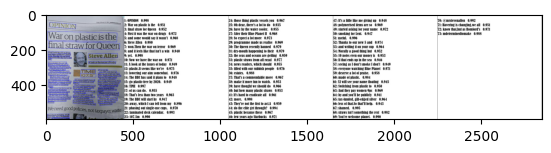

In [40]:
img = cv2.imread('result.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(img)